#Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Basic overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.shape

(8807, 12)

In [6]:
# Check missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#Data Cleaning

In [7]:
# Fill missing values or mark as 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

/tmp/ipython-input-2392335192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2392335192.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['age_of_show'] = 2025 - df['release_year']  # current year
df['num_genres'] = df['listed_in'].fillna('').apply(lambda x: len(x.split(', ')))

#Visulizations

/tmp/ipython-input-92254674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


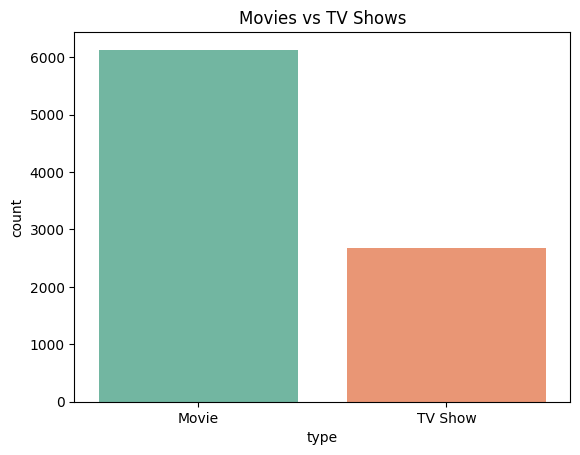

In [9]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows')
plt.show()


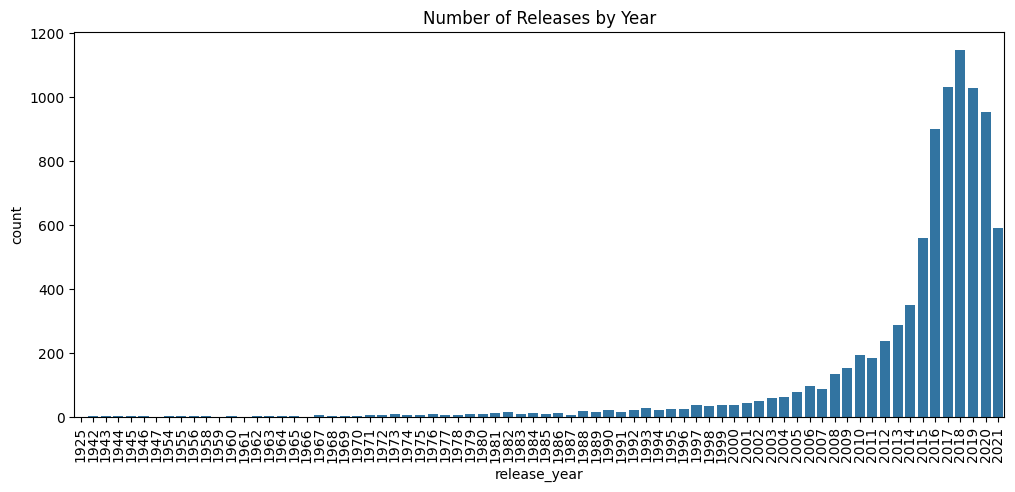

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Number of Releases by Year')
plt.show()


/tmp/ipython-input-4201730507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='Set3')


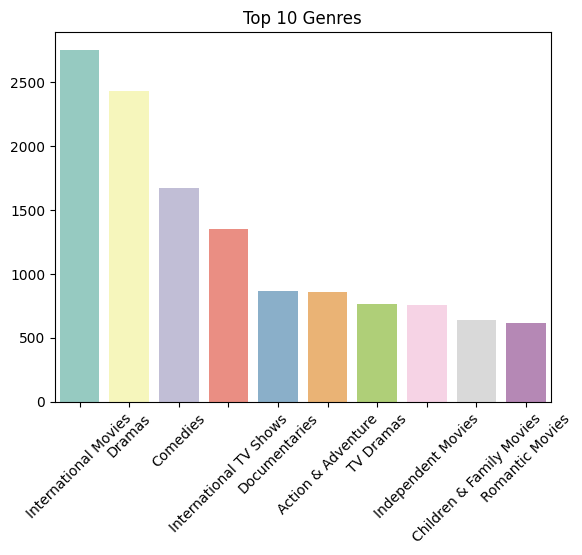

In [11]:
# Split genres and count
from collections import Counter
genres = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(genres)
top_genres = dict(genre_counts.most_common(10))

sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='Set3')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.show()


/tmp/ipython-input-2474754845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')


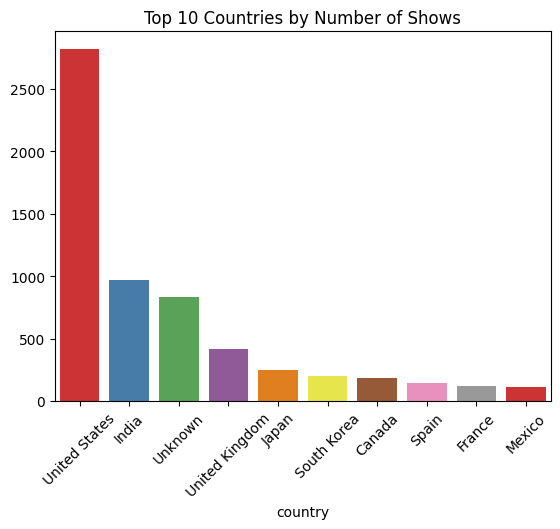

In [12]:
# Top content-producing countries
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Shows')
plt.show()




In [13]:
# Interactive map
fig = px.choropleth(df.groupby('country').size().reset_index(name='count'),
                    locations='country', locationmode='country names',
                    color='count', title='Content Production by Country')
fig.show()

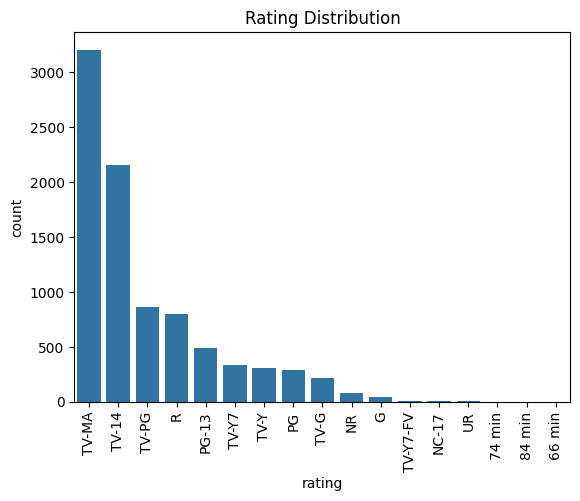

In [14]:
# Ratings distribution
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Rating Distribution')
plt.show()


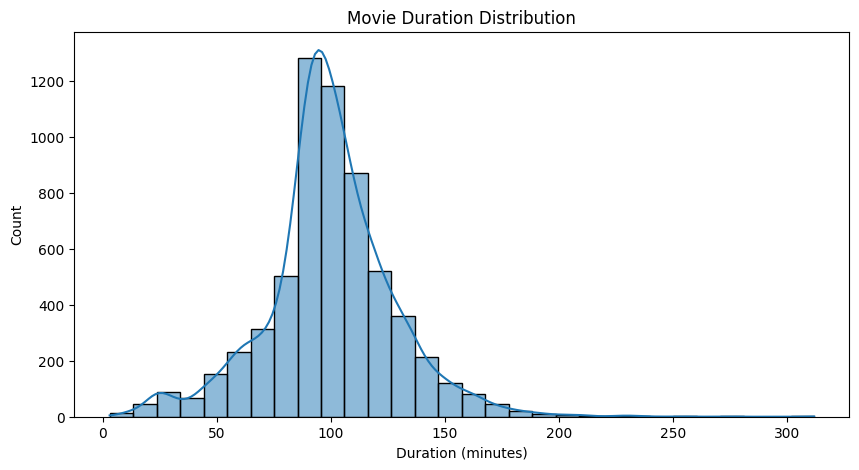

In [15]:
# Duration analysis
movies = df[df['type']=='Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['duration'].str.replace(' min','').astype(float), bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

/tmp/ipython-input-1925572793.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




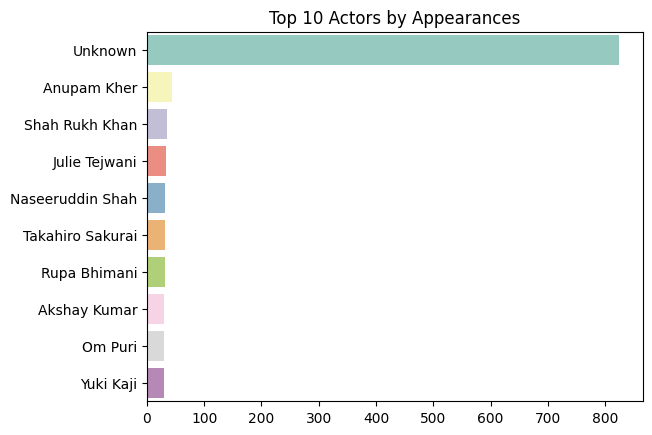

In [16]:
# Top actors (split cast column)
from itertools import chain
actors = list(chain.from_iterable(df['cast'].dropna().str.split(', ')))
actor_counts = Counter(actors).most_common(10)

sns.barplot(x=[x[1] for x in actor_counts], y=[x[0] for x in actor_counts], palette='Set3')
plt.title('Top 10 Actors by Appearances')
plt.show()

In [17]:
genre_trends = df.explode('listed_in'.split(', '))
trend = genre_trends.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
px.line(trend, x='release_year', y='count', color='listed_in', title='Genre Trends Over Years')


In [19]:
# Save cleaned dataset
df.to_csv('netflix_cleaned.csv', index=False)

# Download cleaned dataset
from google.colab import files
files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>